<a href="https://colab.research.google.com/github/adsmetanina/hunter-college-data-week/blob/main/pythonmachinelearning_0820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
ti = sns.load_dataset('titanic').dropna().reset_index(drop=True)
ti

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
1,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
2,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
3,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
4,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
178,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
179,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
180,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


<Axes: xlabel='age', ylabel='Count'>

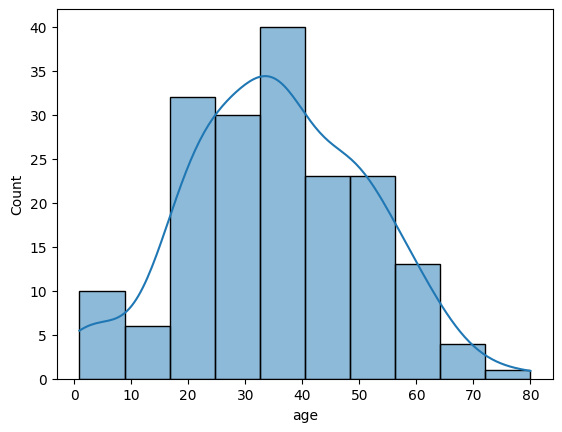

In [3]:
sns.histplot(data=ti['age'], kde=True)

<Axes: xlabel='age', ylabel='Count'>

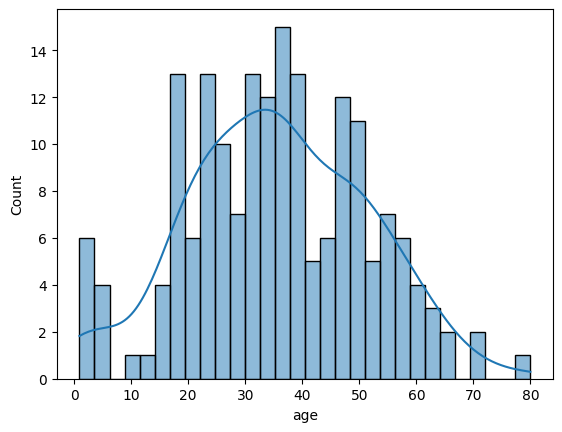

In [4]:
sns.histplot(data=ti['age'], kde=True, bins=30)

<Axes: xlabel='fare'>

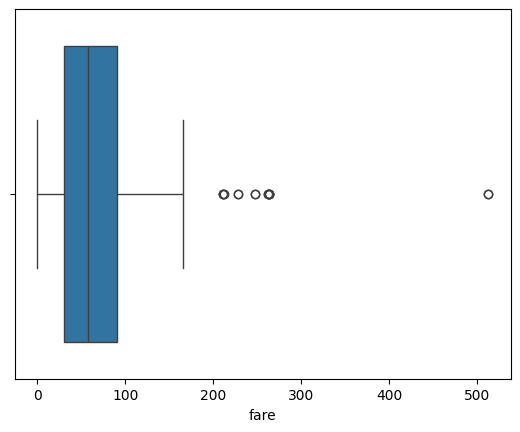

In [5]:
sns.boxplot(x='fare', data=ti)

<Axes: xlabel='fare'>

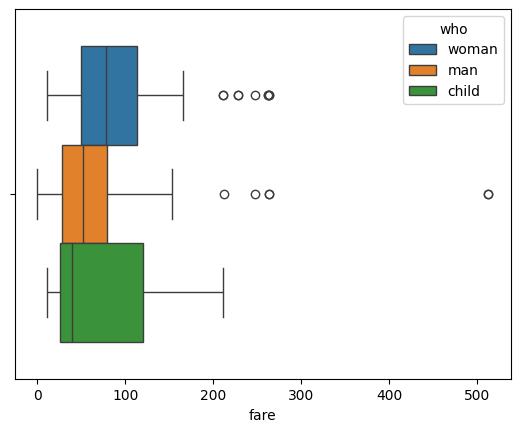

In [6]:
sns.boxplot(x='fare', hue='who', data=ti)

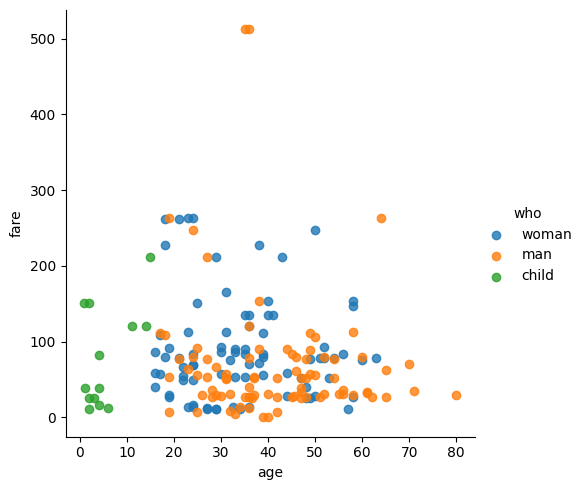

In [7]:
sns.lmplot(x='age',y='fare',hue='who',data=ti,fit_reg=False)

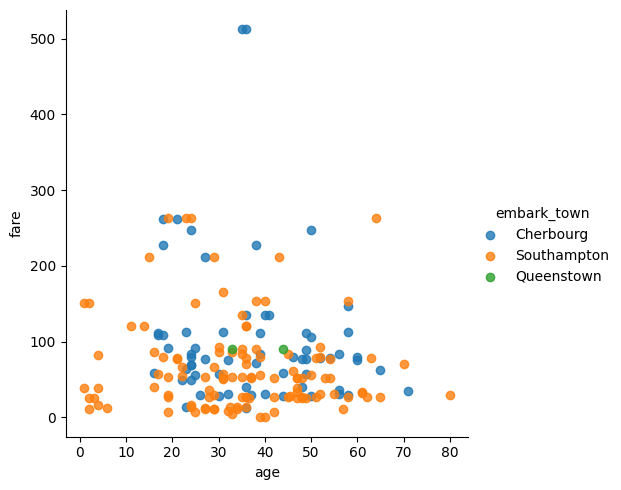

In [8]:
sns.lmplot(x='age',y='fare',hue='embark_town',data=ti,fit_reg=False)

<Axes: xlabel='alive', ylabel='count'>

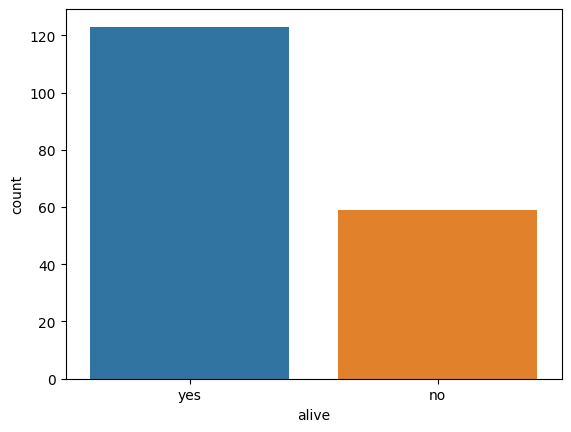

In [9]:
sns.countplot(x='alive',hue='alive', data=ti)

<Axes: xlabel='alive', ylabel='count'>

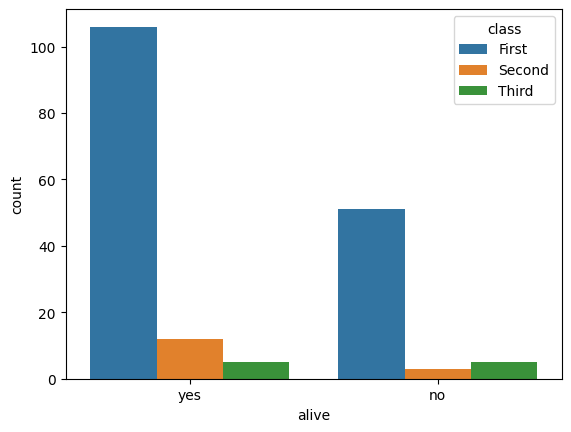

In [10]:
sns.countplot(x='alive',hue='class', data=ti)

<Axes: xlabel='pclass', ylabel='count'>

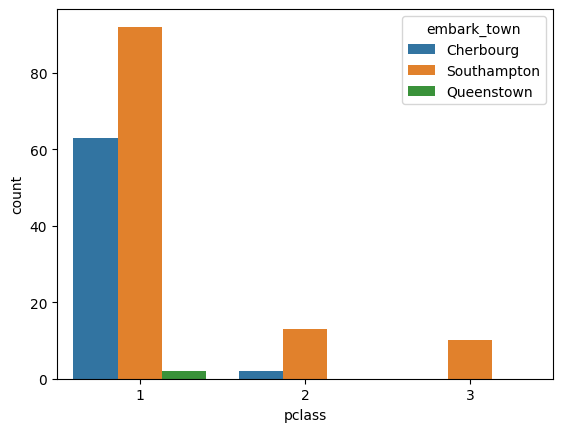

In [11]:
sns.countplot(x='pclass',hue='embark_town', data=ti)

Text(43.2365347222222, 0.5, 'Fare Paid')

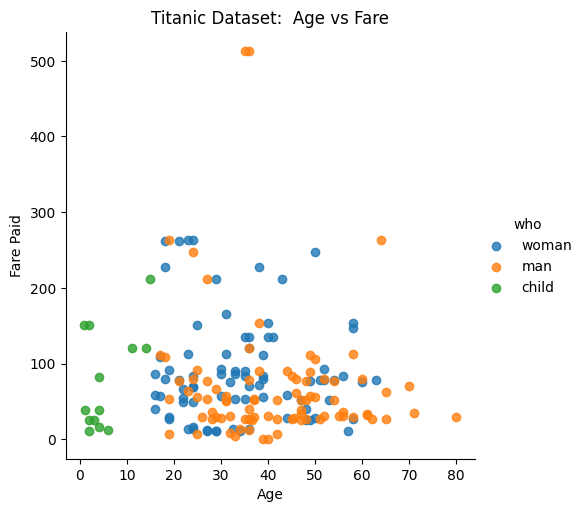

In [12]:
sns.lmplot(x='age',y='fare',hue='who',data=ti,fit_reg=False)
plt.title('Titanic Dataset:  Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare Paid')

In [13]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [14]:
print(f"mean:    ${tips['tip'].mean():.3f}")
print(f"median:  ${tips['tip'].median():.3f}")

mean:    $2.998
median:  $2.900


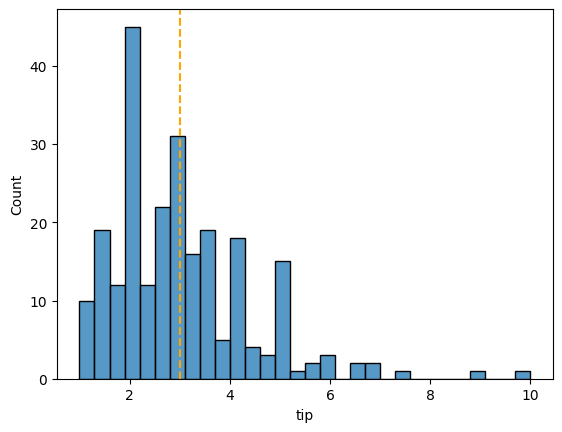

In [15]:
sns.histplot(tips['tip'],bins=30)
plt.axvline(x=3, color='orange', linestyle='--')  #Line for constant model: Theta = $3.00

In [16]:
predicted = [3.0]*len(tips)
mean_squared_error(tips['tip'], predicted)

1.9066114754098362

In [17]:
different_number = 3
predicted = [different_number]*len(tips)
mean_squared_error(tips['tip'], predicted)

1.9066114754098362

<Axes: xlabel='total_bill', ylabel='tip'>

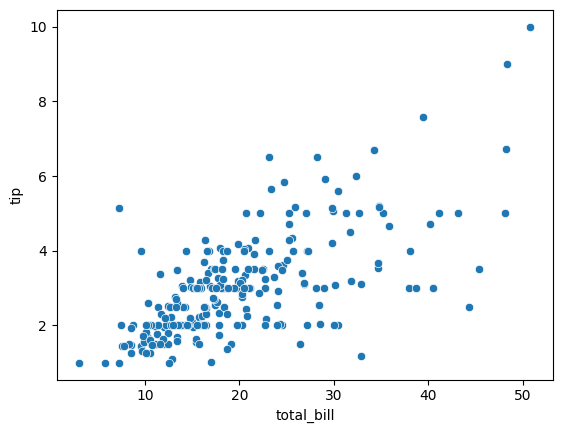

In [18]:
sns.scatterplot(x='total_bill', y='tip', data=tips)

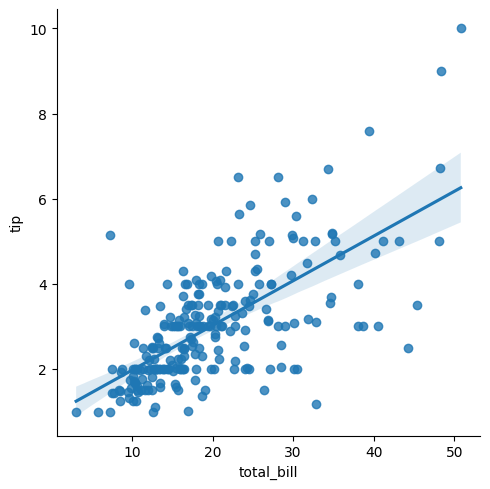

In [19]:
sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=True)

In [20]:
slope, intercept, r_value, p_value, std_err = stats.linregress(tips['total_bill'],tips['tip'])

print(stats.linregress(tips['total_bill'],tips['tip']))

print(f"y = {slope:.2f}x + {intercept:.2f}")
# slope.2f rounds slope to two decimal places
print(slope)

LinregressResult(slope=np.float64(0.1050245173843534), intercept=np.float64(0.9202696135546726), rvalue=np.float64(0.6757341092113641), pvalue=np.float64(6.692470646864404e-34), stderr=np.float64(0.007364789848762602), intercept_stderr=np.float64(0.1597347463764325))
y = 0.11x + 0.92
0.1050245173843534


In [21]:
bill = 10
tip = slope*bill + intercept
print(f"A bill of ${bill} would result in a tip of ${tip:.2f}")

print(tip)

A bill of $10 would result in a tip of $1.97
1.9705147873982065


In [22]:
# Test Yourself: What does the model predict the tip will be for a bill of $40? How does that compare to actual bills for about $40?

bill = 10
tip = slope*bill + intercept
print(f"A bill of ${bill} would result in a tip of ${tip:.2f}")

print(tip)

# $5.12
# similar but not exact to actual bills

A bill of $10 would result in a tip of $1.97
1.9705147873982065


In [23]:
file_name = 'https://stjohn.github.io/datasci/fall23/fred_ccc.csv'
ccc_df = pd.read_csv(file_name)
ccc_df

,DATE,APU0000702421,APU0000708111,APU0000FS1101,PCU3113513113517,APU0000701111,APU0000715211
0,2018-04-01,3.328,2.081,4.153,97.400,0.472,0.617
1,2018-05-01,3.400,1.987,4.112,98.100,0.469,0.628
2,2018-06-01,3.490,1.628,4.064,94.800,0.469,0.629
3,2018-07-01,3.481,1.725,4.110,94.700,0.468,0.630
4,2018-08-01,3.351,1.622,4.085,90.200,0.464,0.628
...,...,...,...,...,...,...,...
60,2023-04-01,5.193,3.270,4.452,147.867,0.542,0.893
61,2023-05-01,5.153,2.666,4.549,149.313,0.544,0.899
62,2023-06-01,5.111,2.219,4.452,150.627,0.551,0.918
63,2023-07-01,5.091,2.094,4.465,154.298,0.564,0.932


In [24]:
names = names = {'APU0000702421' : 'CC Cookies', 'APU0000708111' : 'Eggs', 'APU0000FS1101' : 'Butter', 'PCU3113513113517' : 'Chocolate','APU0000701111' : 'Flour', 'APU0000715211' : 'Sugar'}
ccc_df = ccc_df.rename(columns = names)
ccc_df

,DATE,CC Cookies,Eggs,Butter,Chocolate,Flour,Sugar
0,2018-04-01,3.328,2.081,4.153,97.400,0.472,0.617
1,2018-05-01,3.400,1.987,4.112,98.100,0.469,0.628
2,2018-06-01,3.490,1.628,4.064,94.800,0.469,0.629
3,2018-07-01,3.481,1.725,4.110,94.700,0.468,0.630
4,2018-08-01,3.351,1.622,4.085,90.200,0.464,0.628
...,...,...,...,...,...,...,...
60,2023-04-01,5.193,3.270,4.452,147.867,0.542,0.893
61,2023-05-01,5.153,2.666,4.549,149.313,0.544,0.899
62,2023-06-01,5.111,2.219,4.452,150.627,0.551,0.918
63,2023-07-01,5.091,2.094,4.465,154.298,0.564,0.932


In [25]:
ccc_df = ccc_df.apply(lambda col: pd.to_numeric(col, errors ='coerce'))
ccc_df = ccc_df.drop(columns=['DATE'])
ccc_df = ccc_df.dropna()
ccc_df

,CC Cookies,Eggs,Butter,Chocolate,Flour,Sugar
0,3.328,2.081,4.153,97.400,0.472,0.617
1,3.400,1.987,4.112,98.100,0.469,0.628
2,3.490,1.628,4.064,94.800,0.469,0.629
3,3.481,1.725,4.110,94.700,0.468,0.630
4,3.351,1.622,4.085,90.200,0.464,0.628
...,...,...,...,...,...,...
60,5.193,3.270,4.452,147.867,0.542,0.893
61,5.153,2.666,4.549,149.313,0.544,0.899
62,5.111,2.219,4.452,150.627,0.551,0.918
63,5.091,2.094,4.465,154.298,0.564,0.932


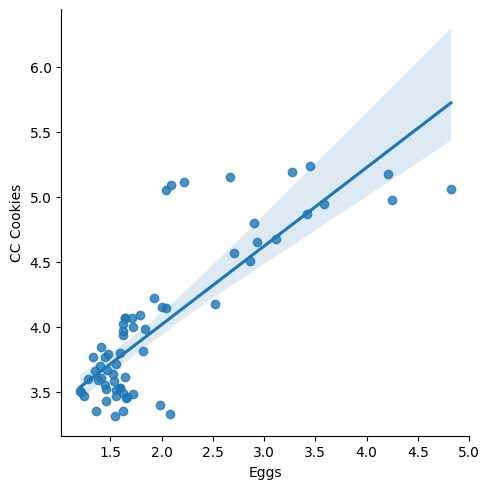

In [26]:
sns.lmplot(x='Eggs', y='CC Cookies', data=ccc_df, fit_reg=True)

In [27]:
slope, intercept, r_value, p_value, std_err = stats.linregress(ccc_df['CC Cookies'],ccc_df['Eggs'])
print(f"y = {slope:.2f}x + {intercept:.2f}")

y = 1.11x + -2.46


In [28]:
correlation_coefficient, p_value = stats.pearsonr(ccc_df['Eggs'], ccc_df['CC Cookies'])
print(f"Correlation coefficient: {correlation_coefficient}")

Correlation coefficient: 0.8193316900440388


In [29]:
# Test Yourself: Does the price of any of the other ingredients have a higher correlation coefficient with the price of cookies than eggs? Compute the correlation coefficient for each and make a scatterplot with the regression line:

correlation_coefficient, p_value = stats.pearsonr(ccc_df['Butter'], ccc_df['CC Cookies'])
print(f"Correlation coefficient: {correlation_coefficient}")

correlation_coefficient, p_value = stats.pearsonr(ccc_df['Chocolate'], ccc_df['CC Cookies'])
print(f"Correlation coefficient: {correlation_coefficient}")

correlation_coefficient, p_value = stats.pearsonr(ccc_df['Flour'], ccc_df['CC Cookies'])
print(f"Correlation coefficient: {correlation_coefficient}")

correlation_coefficient, p_value = stats.pearsonr(ccc_df['Sugar'], ccc_df['CC Cookies'])
print(f"Correlation coefficient: {correlation_coefficient}")

# sugar

Correlation coefficient: 0.6458480653213412
Correlation coefficient: 0.9680963188800069
Correlation coefficient: 0.6901873156022817
Correlation coefficient: 0.9709904260128228


In [30]:
X = tips[['total_bill']]
y = tips['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
reg = LinearRegression()

In [32]:
reg.fit(X_train,y_train)

LinearRegression()

In [33]:
slope = reg.coef_[0]
intercept = reg.intercept_

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: 0.10696370685268658
Intercept: 0.925235558557056


<Axes: xlabel='total_bill', ylabel='tip'>

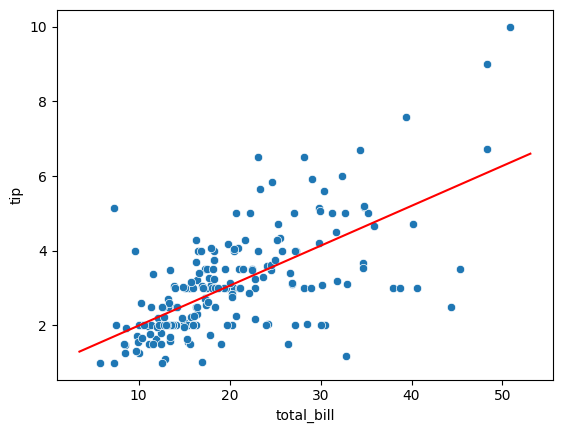

In [34]:
training = pd.concat([X_train['total_bill'], y_train], axis=1)
sns.scatterplot(x='total_bill', y='tip',data=training)
ax = plt.gca() #get the current plot
x_vals = np.array(ax.get_xlim())  #x values for the line
y_vals = intercept + slope * x_vals #use the intercept & slope to get y values
sns.lineplot(x=x_vals,y=y_vals,color='red')

<Axes: xlabel='total_bill', ylabel='tip'>

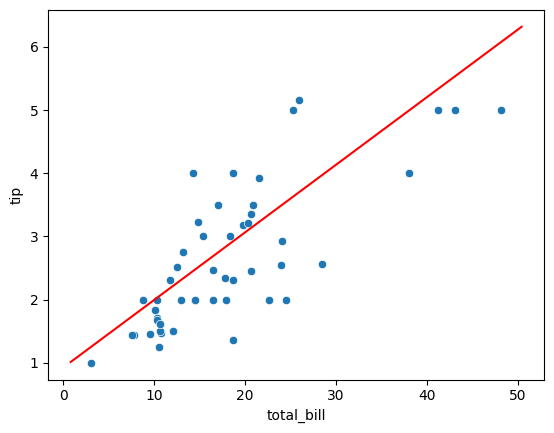

In [35]:
# Test yourself: Modify the code above to plot the same line with a scatterplot of the testing data (instead of the training):

testing = pd.concat([X_test['total_bill'], y_test], axis=1)
sns.scatterplot(x='total_bill', y='tip',data=testing)
ax = plt.gca() #get the current plot
x_vals = np.array(ax.get_xlim())  #x values for the line
y_vals = intercept + slope * x_vals #use the intercept & slope to get y values
sns.lineplot(x=x_vals,y=y_vals,color='red')

In [36]:
y_pred = reg.predict(X_test)

In [37]:
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

Mean squared error: 0.57
Coefficient of determination: 0.54


In [38]:
file_name = 'https://stjohn.github.io/datasci/fall23/fred_ccc.csv'
ccc_df = pd.read_csv(file_name)
ccc_df

,DATE,APU0000702421,APU0000708111,APU0000FS1101,PCU3113513113517,APU0000701111,APU0000715211
0,2018-04-01,3.328,2.081,4.153,97.400,0.472,0.617
1,2018-05-01,3.400,1.987,4.112,98.100,0.469,0.628
2,2018-06-01,3.490,1.628,4.064,94.800,0.469,0.629
3,2018-07-01,3.481,1.725,4.110,94.700,0.468,0.630
4,2018-08-01,3.351,1.622,4.085,90.200,0.464,0.628
...,...,...,...,...,...,...,...
60,2023-04-01,5.193,3.270,4.452,147.867,0.542,0.893
61,2023-05-01,5.153,2.666,4.549,149.313,0.544,0.899
62,2023-06-01,5.111,2.219,4.452,150.627,0.551,0.918
63,2023-07-01,5.091,2.094,4.465,154.298,0.564,0.932


In [39]:
names = names = {'APU0000702421' : 'CC Cookies', 'APU0000708111' : 'Eggs', 'APU0000FS1101' : 'Butter', 'PCU3113513113517' : 'Chocolate','APU0000701111' : 'Flour', 'APU0000715211' : 'Sugar'}
ccc_df = ccc_df.rename(columns = names)
ccc_df

,DATE,CC Cookies,Eggs,Butter,Chocolate,Flour,Sugar
0,2018-04-01,3.328,2.081,4.153,97.400,0.472,0.617
1,2018-05-01,3.400,1.987,4.112,98.100,0.469,0.628
2,2018-06-01,3.490,1.628,4.064,94.800,0.469,0.629
3,2018-07-01,3.481,1.725,4.110,94.700,0.468,0.630
4,2018-08-01,3.351,1.622,4.085,90.200,0.464,0.628
...,...,...,...,...,...,...,...
60,2023-04-01,5.193,3.270,4.452,147.867,0.542,0.893
61,2023-05-01,5.153,2.666,4.549,149.313,0.544,0.899
62,2023-06-01,5.111,2.219,4.452,150.627,0.551,0.918
63,2023-07-01,5.091,2.094,4.465,154.298,0.564,0.932


In [40]:
ccc_df = ccc_df.apply(lambda col: pd.to_numeric(col, errors ='coerce'))
ccc_df = ccc_df.drop(columns=['DATE'])
ccc_df = ccc_df.dropna()
ccc_df

,CC Cookies,Eggs,Butter,Chocolate,Flour,Sugar
0,3.328,2.081,4.153,97.400,0.472,0.617
1,3.400,1.987,4.112,98.100,0.469,0.628
2,3.490,1.628,4.064,94.800,0.469,0.629
3,3.481,1.725,4.110,94.700,0.468,0.630
4,3.351,1.622,4.085,90.200,0.464,0.628
...,...,...,...,...,...,...
60,5.193,3.270,4.452,147.867,0.542,0.893
61,5.153,2.666,4.549,149.313,0.544,0.899
62,5.111,2.219,4.452,150.627,0.551,0.918
63,5.091,2.094,4.465,154.298,0.564,0.932


In [41]:
X = ccc_df[['Eggs']]
y = ccc_df['CC Cookies']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
reg = LinearRegression()

In [43]:
reg.fit(X_train,y_train)

LinearRegression()

In [44]:
slope = reg.coef_[0]
intercept = reg.intercept_

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: 0.6291214479771192
Intercept: 2.765058040410616


<Axes: xlabel='Eggs', ylabel='CC Cookies'>

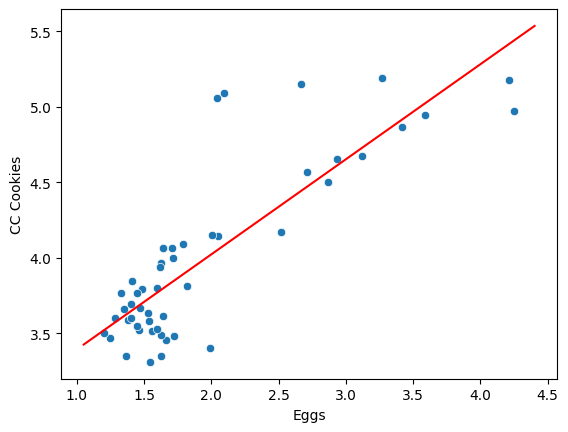

In [45]:
training = pd.concat([X_train['Eggs'], y_train], axis=1)
sns.scatterplot(x='Eggs', y='CC Cookies',data=training)
ax = plt.gca() #get the current plot
x_vals = np.array(ax.get_xlim())  #x values for the line
y_vals = intercept + slope * x_vals #use the intercept & slope to get y values
sns.lineplot(x=x_vals,y=y_vals,color='red')

<Axes: xlabel='Eggs', ylabel='CC Cookies'>

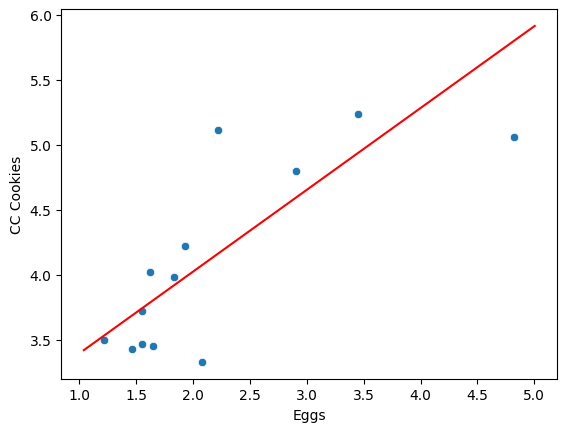

In [46]:
testing = pd.concat([X_test['Eggs'], y_test], axis=1)
sns.scatterplot(x='Eggs', y='CC Cookies',data=testing)
ax = plt.gca() #get the current plot
x_vals = np.array(ax.get_xlim())  #x values for the line
y_vals = intercept + slope * x_vals #use the intercept & slope to get y values
sns.lineplot(x=x_vals,y=y_vals,color='red')